Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas Data-Frame
credit_card_data = pd.read_csv('/content/credit_card.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
39697,39927,-1.466679,2.425732,0.877724,3.950765,0.762477,1.162748,0.575625,-0.288354,-1.357990,...,0.186051,0.571010,-0.107517,-0.754306,-0.752828,0.113179,-2.079421,-0.809173,1.50,0.0
39698,39927,-0.523165,-0.100021,0.892966,-1.900405,-0.156870,-0.783894,0.917683,-0.308345,-1.305284,...,-0.082504,-0.414677,-0.063392,-0.087455,-0.303383,-0.682889,-0.178417,-0.137169,100.92,0.0
39699,39928,-2.768425,-1.007072,2.151127,0.117797,1.283178,1.869731,-0.562240,0.820374,0.348797,...,-0.182963,0.778210,0.904077,-1.288631,0.212441,0.483975,-0.027614,-0.582813,11.99,0.0
39700,39928,1.201327,0.158614,-0.325263,0.471667,0.086446,-0.770357,0.422151,-0.205277,-0.451865,...,0.027664,-0.018485,-0.199382,0.053605,0.683829,0.428416,-0.077342,-0.006394,45.00,0.0
39701,39929,1.097669,-1.315782,0.659681,-0.683915,-1.342612,0.332629,-1.110900,0.194811,-0.248825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39702 entries, 0 to 39701
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    39702 non-null  int64  
 1   V1      39702 non-null  float64
 2   V2      39702 non-null  float64
 3   V3      39702 non-null  float64
 4   V4      39702 non-null  float64
 5   V5      39702 non-null  float64
 6   V6      39702 non-null  float64
 7   V7      39702 non-null  float64
 8   V8      39702 non-null  float64
 9   V9      39702 non-null  float64
 10  V10     39702 non-null  float64
 11  V11     39702 non-null  float64
 12  V12     39702 non-null  float64
 13  V13     39701 non-null  float64
 14  V14     39701 non-null  float64
 15  V15     39701 non-null  float64
 16  V16     39701 non-null  float64
 17  V17     39701 non-null  float64
 18  V18     39701 non-null  float64
 19  V19     39701 non-null  float64
 20  V20     39701 non-null  float64
 21  V21     39701 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data.shape

(39702, 31)

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

<ipython-input-12-325c4395f471>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data.Amount)


<Axes: xlabel='Amount', ylabel='Density'>

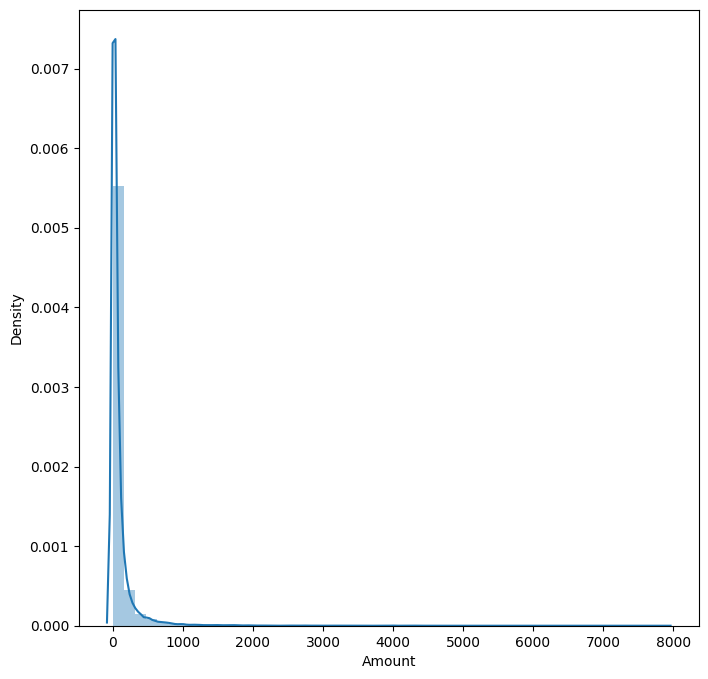

In [ ]:
# analyze the distribution of data of Amount
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(credit_card_data.Amount)

Replace the missing values with Median value

In [ ]:
credit_card_data['Amount'].fillna(credit_card_data['Amount'].median(), inplace=True)

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    0
Class     1
dtype: int64

<ipython-input-17-e977b056774b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data.Class)


<Axes: xlabel='Class', ylabel='Density'>

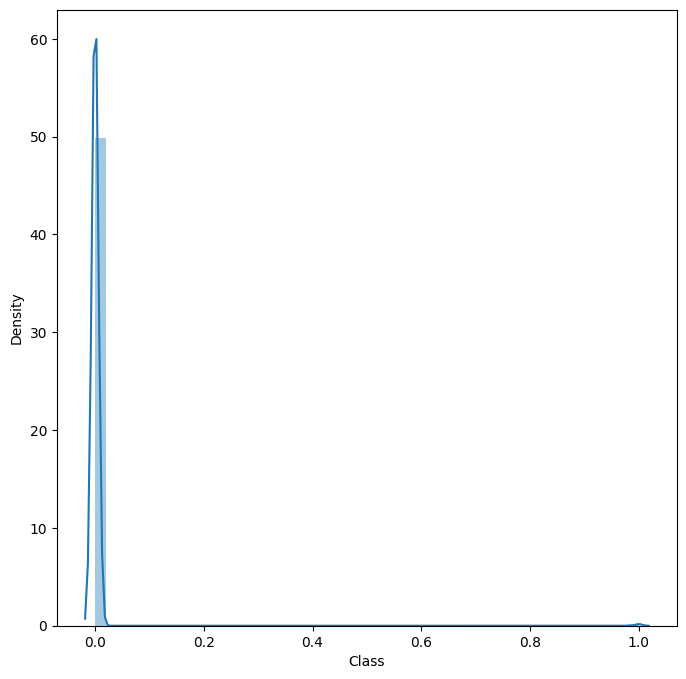

In [ ]:
# analyze the distribution of data of Class
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(credit_card_data.Class)

In [ ]:
credit_card_data['Class'].fillna(credit_card_data['Class'].median(), inplace=True)

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card_data['V13'].fillna(credit_card_data['V13'].median(), inplace=True)
credit_card_data['V14'].fillna(credit_card_data['V14'].median(), inplace=True)
credit_card_data['V15'].fillna(credit_card_data['V15'].median(), inplace=True)
credit_card_data['V16'].fillna(credit_card_data['V16'].median(), inplace=True)
credit_card_data['V17'].fillna(credit_card_data['V17'].median(), inplace=True)
credit_card_data['V18'].fillna(credit_card_data['V18'].median(), inplace=True)
credit_card_data['V19'].fillna(credit_card_data['V19'].median(), inplace=True)
credit_card_data['V20'].fillna(credit_card_data['V20'].median(), inplace=True)
credit_card_data['V21'].fillna(credit_card_data['V21'].median(), inplace=True)
credit_card_data['V22'].fillna(credit_card_data['V22'].median(), inplace=True)
credit_card_data['V23'].fillna(credit_card_data['V23'].median(), inplace=True)
credit_card_data['V24'].fillna(credit_card_data['V24'].median(), inplace=True)
credit_card_data['V25'].fillna(credit_card_data['V25'].median(), inplace=True)
credit_card_data['V26'].fillna(credit_card_data['V26'].median(), inplace=True)
credit_card_data['V27'].fillna(credit_card_data['V27'].median(), inplace=True)
credit_card_data['V28'].fillna(credit_card_data['V28'].median(), inplace=True)

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    39598
1.0      104
Name: count, dtype: int64

This Dataset is highly unbalanced

0 ---> Normal Transaction,
1 ---> Fraudulent Transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(39598, 31)
(104, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    39598.000000
mean        87.419084
std        234.511642
min          0.000000
25%          7.420000
50%         23.500000
75%         79.000000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     104.000000
mean       97.070769
std       255.012160
min         0.000000
25%         1.000000
50%         3.775000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,25515.089702,-0.194278,0.036933,0.744160,0.174523,-0.217442,0.107157,-0.093208,0.031787,0.222422,...,0.046045,-0.031388,-0.111706,-0.039470,0.007852,0.135896,0.022777,0.005987,0.003920,87.419084
1.0,20683.201923,-7.697309,5.766703,-10.853666,5.865850,-5.424996,-2.275717,-7.641867,3.827809,-2.924282,...,0.663205,0.626795,-0.345972,-0.342944,-0.230514,0.299242,0.176522,0.811431,0.099914,97.070769


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of Fraudulent Transaction ---> 104

In [ ]:
legit_sample = legit.sample(n=104)

Concatenate two Data-Frames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3458,2942,-0.455382,0.465230,1.478102,1.218583,0.393910,0.084723,1.075616,-0.220123,-0.327279,...,0.049360,0.392740,0.067609,0.106963,-0.240801,-0.352548,0.004406,-0.052381,94.80,0.0
32259,36711,-0.925800,-0.130049,0.985202,-2.581707,-0.744619,0.579239,1.222262,0.140994,1.107162,...,0.121232,0.622766,-0.054898,-0.234766,-0.128002,-0.164475,0.106767,0.048280,222.28,0.0
15064,26411,0.861395,-0.841689,-0.398506,-0.749060,-0.336410,-0.096605,0.109878,0.144526,1.121818,...,0.166852,0.309494,-0.267369,-0.273746,0.649087,-0.473577,0.018908,0.019187,168.06,0.0
9779,14491,1.100940,-0.237282,0.902657,0.235317,-0.795147,-0.169852,-0.649310,0.120464,1.605197,...,0.028800,0.240240,0.018667,0.228062,0.035340,1.031162,-0.087326,-0.003698,39.00,0.0
11641,19913,1.457353,-0.488648,0.117452,-0.685080,-0.294125,0.322465,-0.764331,-0.029669,0.634478,...,-0.207983,-0.264469,-0.197134,-1.019619,0.693191,-0.218333,-0.015822,-0.017089,5.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0
33276,37167,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1.0
39183,39729,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83,1.0


In [ ]:
new_dataset['Class'].value_counts()

Class
0.0    104
1.0    104
Name: count, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,25662.817308,-0.233935,0.254583,0.749956,0.179472,-0.203759,-0.111451,-0.004032,0.165947,0.156660,...,0.090777,-0.108297,-0.178533,-0.024386,-0.006166,0.038024,0.032490,0.019237,0.017860,68.273173
1.0,20683.201923,-7.697309,5.766703,-10.853666,5.865850,-5.424996,-2.275717,-7.641867,3.827809,-2.924282,...,0.663205,0.626795,-0.345972,-0.342944,-0.230514,0.299242,0.176522,0.811431,0.099914,97.070769


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
3458    2942 -0.455382  0.465230  1.478102  1.218583  0.393910  0.084723   
32259  36711 -0.925800 -0.130049  0.985202 -2.581707 -0.744619  0.579239   
15064  26411  0.861395 -0.841689 -0.398506 -0.749060 -0.336410 -0.096605   
9779   14491  1.100940 -0.237282  0.902657  0.235317 -0.795147 -0.169852   
11641  19913  1.457353 -0.488648  0.117452 -0.685080 -0.294125  0.322465   
...      ...       ...       ...       ...       ...       ...       ...   
30473  35942 -4.194074  4.382897 -5.118363  4.455230 -4.812621 -1.224645   
30496  35953 -4.844372  5.649439 -6.730396  5.252842 -4.409566 -1.740767   
31002  36170 -5.685013  5.776516 -7.064977  5.902715 -4.715564 -1.755633   
33276  37167 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   
39183  39729 -0.964567 -1.643541 -0.187727  1.158253 -2.458336  0.852222   

             V7        V8        V9  ...       V20       V21       V22  \
3458   1.0756

In [ ]:
print(Y)

3458     0.0
32259    0.0
15064    0.0
9779     0.0
11641    0.0
        ... 
30473    1.0
30496    1.0
31002    1.0
33276    1.0
39183    1.0
Name: Class, Length: 208, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 30) (166, 30) (42, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Traing Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9759036144578314


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9523809523809523
